<a href="https://colab.research.google.com/github/Chenjing2022/Chenjing2022/blob/main/8_1_Correlation_with_linregress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces **scipy** library

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package 
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`) 

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit 


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


In [1]:
!pip install --upgrade openpyxl



### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up 

In [21]:
import pandas as pd
from scipy.stats import linregress
url = "https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true"
county_level_df= pd.read_excel(url, sheet_name ="county-level")
county_level_df[0:6]

,State,County,Population,Age,Income
0,TX,1.0,72.0,34.0,65.0
1,TX,2.0,33.0,42.0,45.0
2,TX,5.0,25.0,23.0,46.0
3,TX,6.0,54.0,36.0,65.0
4,TX,7.0,11.0,42.0,53.0
5,TX,8.0,28.0,25.0,62.0


In [15]:
x = county_level_df ["Age"]
y = county_level_df ["Income"]
regression = linregress(x,y) 
regression

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)

In [16]:
print(regression.slope)
print(regression.intercept)
print(regression.rvalue)

-0.31433084434233205
72.78388856978748
-0.14787411576068246


### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Expected output**:   
0.013558605755058871


In [23]:
x = county_level_df ["Population"]
y = county_level_df ["Income"]
regression = linregress(x,y)
regression

LinregressResult(slope=0.05737132629483762, intercept=60.95698211316883, rvalue=0.11644142628402862, pvalue=0.6454275157910035, stderr=0.12233846479490115)

In [18]:
print(regression.slope)
print(regression.intercept)
print(regression.rvalue)

0.05737132629483762
60.95698211316883
0.11644142628402862


R-square value tells you how much variation is explained by your model. So 0.1 R-square means that the model explains 10% of variation within the data. The greater R-square the better the model. Whereas p-value tells you about the F statistic hypothesis testing of the "fit of the intercept-only model and your model are equal". So if the p-value is less than the significance level (usually 0.05) then your model fits the data well.                             
In this case the results whows a very low R-square R² = 0.0136 equally to rvalue 0.116 that and high p-value 0.645. In ohter word only 11.6% of the difference in income values can be caused by population.Hence, the model doesn't explain much of variation of the data and it is not significant. 

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [22]:
url = "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true%22"
df= pd.read_csv(url)
df[0:6]

,Age,English,firstlanguage,sex,origin,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
0,24,Your Second Language,Arabic,Female,Outside Europe,0.0,4.60,44,26,19,22,10,32,2017
1,22,Your Second Language,Arabic,Female,Outside Europe,0.0,2.60,29,10,37,9,16,10,2017
2,26,Your Second Language,Burmese,Female,Outside Europe,0.0,4.13,26,20,20,18,20,24,2017
3,23,Your Second Language,Chinese,Male,Outside Europe,0.0,2.77,30,16,28,20,17,10,2017
4,25,Your Second Language,Chinese,Female,Outside Europe,0.0,3.80,33,27,15,18,12,17,2017
5,24,Your Second Language,Chinese,Male,Outside Europe,2.0,4.40,34,25,21,19,13,17,2017


In [24]:
x = df ["Stress"]
y = df ["Wellbeing"]
regression = linregress(x,y)
regression

LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)

R-square value tells you how much variation is explained by your model. So 0.1 R-square means that the model explains 10% of variation within the data. The greater R-square the better the model. Whereas p-value tells you about the F statistic hypothesis testing of the "fit of the intercept-only model and your model are equal". So if the p-value is less than the significance level (usually 0.05) then your model fits the data well. 
                          
In this case the results whows R² = 0.045 and very high p-value 0.06.  In ohter word only 4.5% of the difference in wellbeing values can be caused by stress. Hence, the model doesn't explain much of variation of the data but it is significant (better than not having a model).

In [70]:
slope = regression.slope
intercept = regression.intercept
rvalue = regression.rvalue
r_sqr = rvalue * rvalue
pvalue = regression.pvalue


In [73]:
def check_result(): 
  rvalue = regression.rvalue
  r_sqr = rvalue * rvalue
  pvalue = regression.pvalue
  print("r sqr =", r_sqr)
  if pvalue < 0.05: #if a p value is less 0.05, we reject the null hypothesis and say that the data is statistically significant. otherwise we accept the null hypothesis.
    print("Model is significant, p < 0.05:", pvalue)
  else: 
    print("Model is not significant")
check_result()


r sqr = 0.4507725540176983
Model is significant, p < 0.05: 6.084540561441803e-07


# Create some charts and make some predictions from regressions

1.  Using what you know from completing the Visualisation worksheets (matplotlib and Seaborn), plot the various regression results in a set of charts.
2.  Use the slope and intercept to calculate a prediction for a reasonable value (e.g. predict an income for a given age using the slope and intercept from the regression to calculate income from the formula `age * slope + intercept`

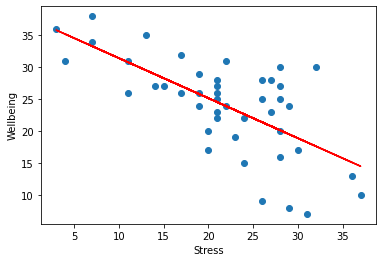

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlabel("Stress")
plt.ylabel("Wellbeing")
plt.plot(x, slope * x + intercept, "red")
plt.show()

In [66]:
x = 5
y = slope * x + intercept
print(y)

34.573963255474325


In [74]:
x = 35
y = slope * x + intercept
print(y)


15.736812508917566


When stress level is 5 which reaches at the point of 34.57 of wellbeing. On the contrary, when the level of stress reaches the highest level such as 35, people's happiness index will decrease to 15.73.

# Further reference on linear regression

[at statisticalsolutions.com](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)